<a href="https://colab.research.google.com/github/RancyChepchirchir/hello-world/blob/master/Carbon_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
carbon_em = pd.read_csv('carbon_emission.csv', parse_dates=['Year'])

In [5]:
carbon_em.head()

,Year,CO2_emissions_kt
0,1960-01-01,2427.554
1,1961-01-01,2401.885
2,1962-01-01,2625.572
3,1963-01-01,2856.593
4,1964-01-01,2827.257


In [38]:
carbon_em.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2_emissions_kt,55.0,6434.1182,3304.047086,2401.885,3896.1875,5192.472,8945.6465,14286.632


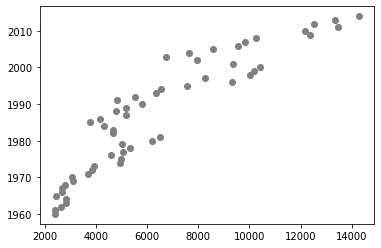

In [43]:
x = carbon_em.CO2_emissions_kt
y = carbon_em.Year
plt.scatter(x, y, color='gray')
plt.show()

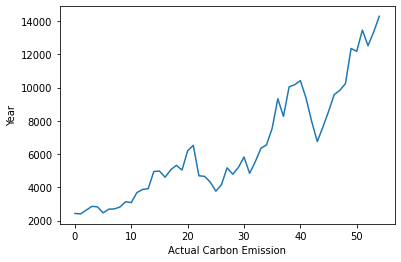

In [37]:
plt.xlabel('Actual Carbon Emission')  
plt.ylabel('Year') 
x.plot()
plt.show()

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  rolmean = pd.Series(carbon_em).rolling(window=1).mean()
  rolstd = pd.Series(carbon_em).rolling(window=1).std()

  #Plot rolling statistics:
  orig = plt.plot(carbon_em, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(carbon_em, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

In [50]:
df = x.values
series = np.log(df)
# We can now calculate the mean and standard deviation of the values of the log transformed dataset.
split = round(len(series) / 2)
series1, series2 = series[0:split], series[split:]
mean1, mean2 = series1.mean(), series2.mean()
var1, var2 = series1.var(), series2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=8.240572, mean2=9.055603
variance1=0.089479, variance2=0.101525


In [58]:
'''plt.xlabel('Log of Actual Carbon Emission')  
plt.ylabel('Year') 
series1.plot()
plt.show()'''

"plt.xlabel('Log of Actual Carbon Emission')  \nplt.ylabel('Year') \nseries1.plot()\nplt.show()"

In [51]:
result = adfuller(df)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.351289
p-value: 0.979579
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


In [0]:
# from above adf results, p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root 
# and is non-stationary

In [59]:
result = adfuller(series)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.715333
p-value: 0.842738
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
